In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage

In [2]:
data = plt.imread('bunny_line.png')[:,:,0]
data.shape

(1024, 1024)

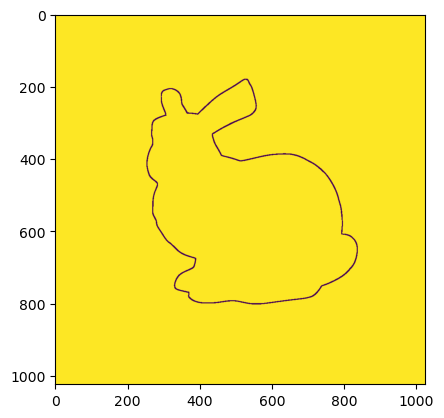

In [3]:
plt.imshow(data)

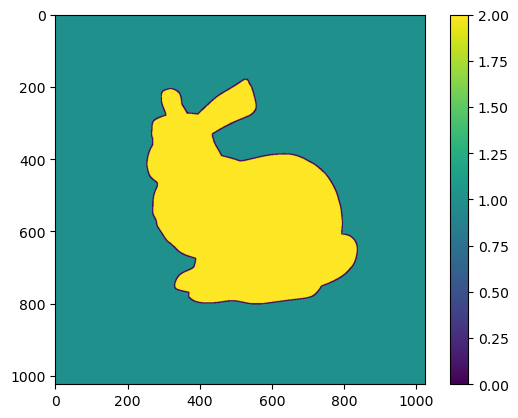

In [42]:
l = skimage.measure.label(data)
plt.imshow(l)
plt.colorbar()

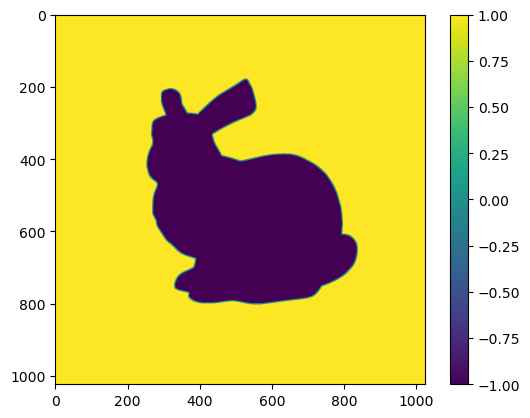

In [44]:
s = l
s[s == 2] = -1
plt.imshow(s)
plt.colorbar()

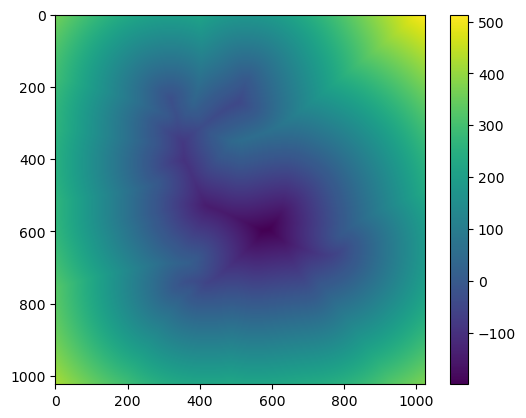

In [45]:
dist = scipy.ndimage.distance_transform_edt(data) * s
plt.imshow(dist)
plt.colorbar()

In [46]:
def dist_to_color(x):
    if x > 0:
        if x < 5:
            return np.array([0.0, 0.0, 0.0])
        elif x < 25:
            return np.array([77/255, 120/255, 255/255])
        elif x < 45:
            return np.array([123/255, 157/255, 255/255])
        elif x < 65:
            return np.array([187/255, 205/255, 255/255])
        else:
            return np.array([1,1,1])
    else:
        x = abs(x)
        if x < 5:
            return np.array([0.0, 0.0, 0.0])
        elif x < 25:
            return np.array([255/255, 84/255, 84/255])
        elif x < 45:
            return np.array([255/255, 158/255, 158/255])
        elif x < 65:
            return np.array([255/255, 199/255, 199/255])
        else:
            return np.array([1,1,1])

color = np.zeros((1024,1024,3), dtype=np.float32)
it = np.nditer(dist, flags=['multi_index'])
for x in it:
    c = dist_to_color(x)
    color[it.multi_index] = c

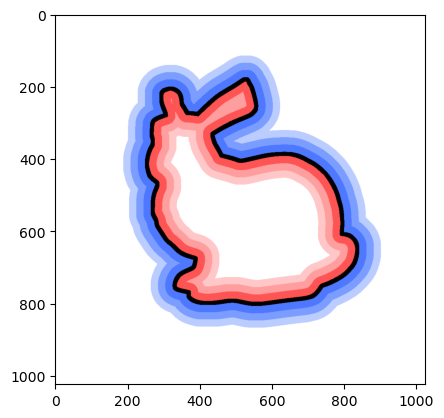

In [47]:
plt.imshow(color)

In [49]:
plt.imsave('bunny_color.png', color)